##  VIDEO: Sine waves and their parameters

In [34]:
import sys
sys.path.insert(1, '../')
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.io import loadmat
from numpy.fft import fft


pi = np.pi

In [2]:
# %%% The goal of this cell is to create a signal by summing together sine waves.

# % define a sampling rate
srate = 1000

# % list some frequencies
frex = [ 3  , 10 ,  5 ,  15,   35 ];

# % list some random amplitudes... make sure there are the same number of
# % amplitudes as there are frequencies!
amplit = [ 5  , 15 ,  10,   5 ,  7 ];

# % phases... list some random numbers between -pi and pi
phases = [  pi/7,  pi/8 , pi , pi/2 , -pi/4 ];

# define time
time = np.arange(-1, 1, 1/srate)

In [3]:
sine_waves = np.zeros((len(frex), len(time)))

for fi in range(len(frex)):
    sine_waves[fi, :] = amplit[fi] * np.sin(2 * pi * frex[fi] * time + phases[fi])

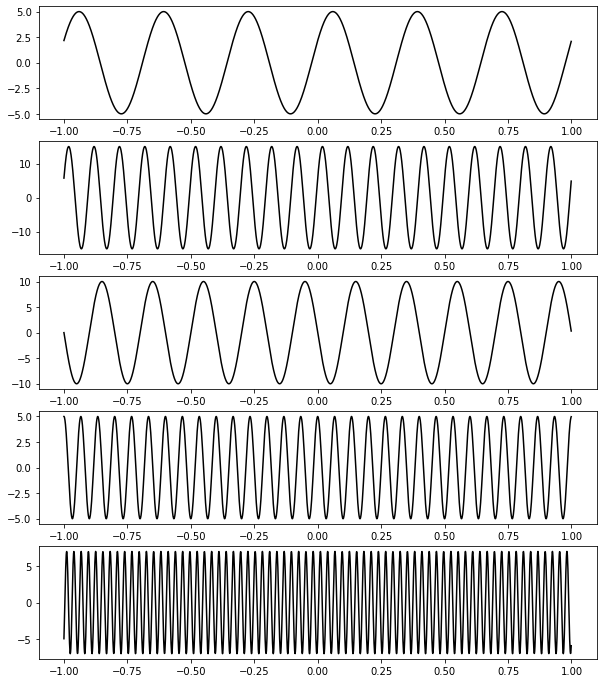

In [4]:
# plot

fig, axs = plt.subplots(len(amplit), figsize=(10,12))
for sinei in range(len(amplit)):
    axs[sinei].plot(time, sine_waves[sinei, :], 'k')

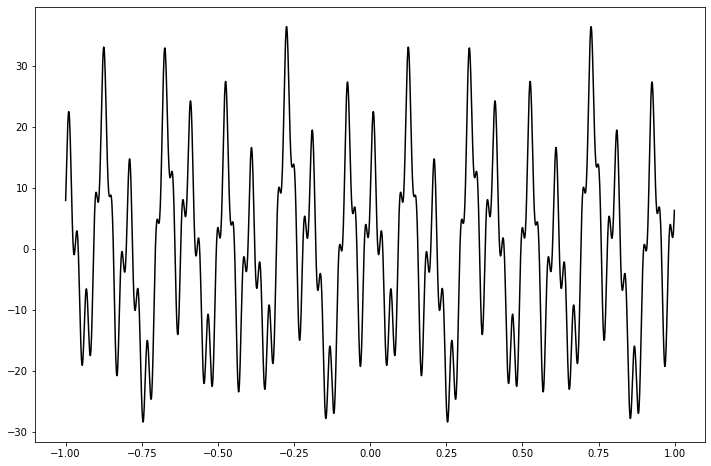

In [5]:
# plot sum of sine waves
plt.figure(figsize=(12, 8))
plt.plot(time, np.sum(sine_waves, axis=0), 'k')
plt.show()

## VIDEO: Complex numbers and Euler's formula

In [6]:
z = complex(1, 2)
z = complex("1+2j")
z = 1 + 2j

print(z.real, z.imag)

1.0 2.0


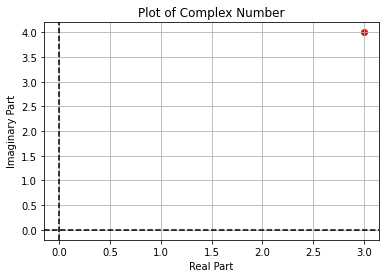

In [7]:
z = 3 + 4j

# Get the real and imaginary parts
real_part = z.real
imaginary_part = z.imag

# Plotting
plt.scatter(real_part, imaginary_part, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Plot of Complex Number')
plt.grid(True)
plt.show()


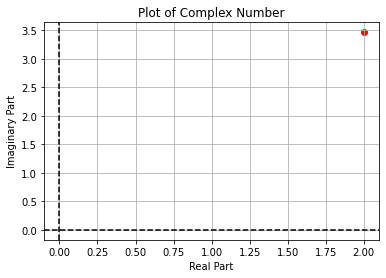

In [8]:
# %% Euler's formula and the complex plane

# % use Euler's formula to plot vectors

m = 4
k = pi/3
compnum = m*np.exp(1j*k)

mag = abs(compnum)
phs = cmath.phase(compnum)

# Plotting
plt.scatter(compnum.real, compnum.imag, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Plot of Complex Number')
plt.grid(True)
plt.show()

##  VIDEO: The dot product and sine waves

In [9]:
v1 = np.array([ 2, 4, 2, 1, 5, 3, 1 ])
v2 = np.array([ 4 ,2 , 2, -3, 2 ,5, 2 ]);

dp1 = np.sum(v1 * v2)
dp2 = np.dot(v1, v2)
dp1, dp2

(44, 44)

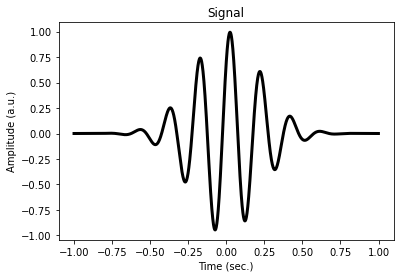

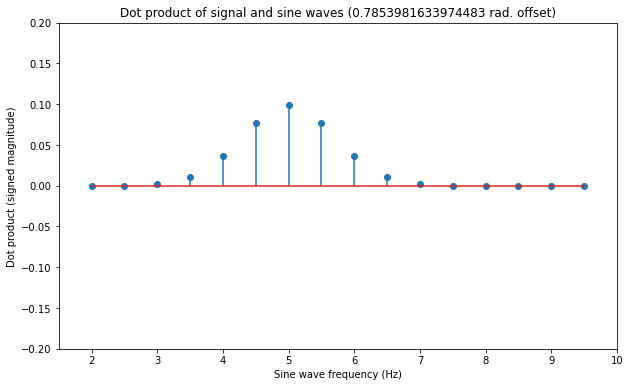

In [10]:
# % phase of signal
theta = 1*pi/4;


# % simulation parameters
srate = 1000;
time  = np.arange(-1, 1, 1/srate)

# % here is the signal (don't change this line)
signal = np.sin(2*pi*5*time + theta) * np.exp( (-time**2) / .1);

# % sine wave frequencies (Hz)
sinefrex = np.arange(2, 10, 0.5) 

plt.plot(time, signal, 'k', linewidth=3)
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Signal')
plt.show()

dps = np.zeros(sinefrex.shape)
for fi in range(len(dps)):
    sinew = np.sin(2 * pi * sinefrex[fi] * time)
    
    dps[fi] = np.dot(sinew, signal) / len(time)
    
# Plotting
plt.figure(figsize=(10,6))
plt.stem(sinefrex, dps)
plt.xlim([sinefrex[0] - 0.5, sinefrex[-1] + 0.5])
plt.ylim([-0.2, 0.2])
plt.xlabel('Sine wave frequency (Hz)')
plt.ylabel('Dot product (signed magnitude)')
plt.title('Dot product of signal and sine waves (' + str(theta) + ' rad. offset)')
plt.show()

##  VIDEO: The complex dot product

In [11]:
# % two vectors
v1 = [  3j,  4,  5, -3j ];
v2 = [ -3j, 1j,  1,  0  ];

# % notice the dot product is a complex number
np.dot(v1, v2)

(14+4j)

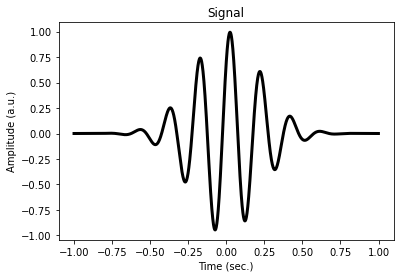

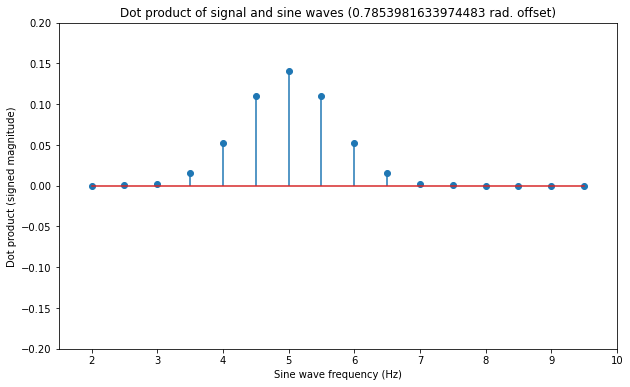

In [12]:
# % phase of signal
theta = 1*pi/4;


# % simulation parameters
srate = 1000;
time  = np.arange(-1, 1, 1/srate)

# % here is the signal (don't change this line)
signal = np.sin(2*pi*5*time + theta) * np.exp( (-time**2) / .1);

# % sine wave frequencies (Hz)
sinefrex = np.arange(2, 10, 0.5) 

plt.plot(time, signal, 'k', linewidth=3)
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Signal')
plt.show()

dps = np.zeros(sinefrex.shape)
for fi in range(len(dps)):
    csw = np.exp(2*1j*pi*sinefrex[fi]*time )
    
    dps[fi] = abs(np.dot(csw, signal)) / len(time)
    
# Plotting
plt.figure(figsize=(10,6))
plt.stem(sinefrex, dps)
plt.xlim([sinefrex[0] - 0.5, sinefrex[-1] + 0.5])
plt.ylim([-0.2, 0.2])
plt.xlabel('Sine wave frequency (Hz)')
plt.ylabel('Dot product (signed magnitude)')
plt.title('Dot product of signal and sine waves (' + str(theta) + ' rad. offset)')
plt.show()

## %   VIDEO: The discrete-time Fourier transform


In [13]:
srate = 1000
frex = [3,10,5,15,35]
amplit = [5,15,10,5,7]

time = np.arange(-1,1, 1/srate)

# now loop through frequencies and create sine waves
signal = np.zeros(len(time))
for i in range(len(frex)):
    signal += amplit[i] * np.sin(2*pi*time*frex[i])

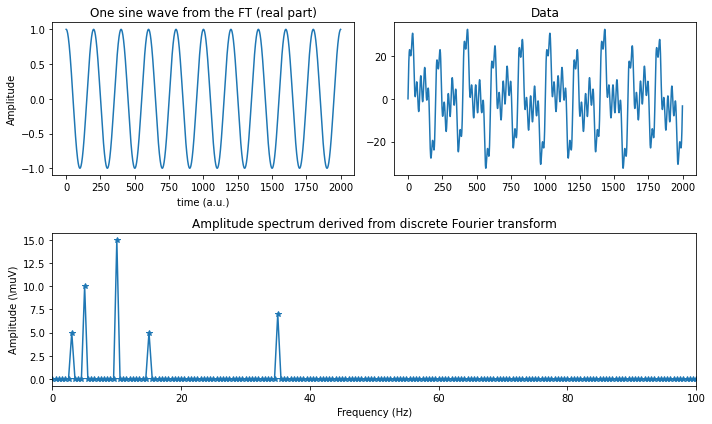

In [14]:
# %% The Fourier transform in a loop

# %%% The goal of this section of code is to implement
# %   the Fourier transform in a loop, as described in lecture.

N           = len(signal); # length of sequence
fourierTime = np.arange(N)/N;    # "time" used for sine waves
nyquist     = srate/2;        # Nyquist frequency -- the highest frequency you can measure in the data

# % initialize Fourier output matrix
fourierCoefs = np.zeros(signal.shape, dtype=complex);

# % These are the actual frequencies in Hz that will be returned by the
# % Fourier transform. The number of unique frequencies we can measure is
# % exactly 1/2 of the number of data points in the time series (plus DC).
frequencies = np.linspace(0,nyquist,N//2+1);

# loop over frequencies
for fi in range(N):
    # create complex-valued sine wave for this frequency
    fourierSine = np.exp(-1j * 2 * np.pi * fi * fourierTime)

    # compute dot product between sine wave and signal
    fourierCoefs[fi] = np.dot(fourierSine, signal)

# scale Fourier coefficients to original scale
fourierCoefs = fourierCoefs / N

# create plots
fig = plt.figure(7, figsize=(10,6))

plt.subplot(221)
plt.plot(np.real(np.exp(-2 * np.pi * 1j * 10 * fourierTime)))
plt.xlabel('time (a.u.)')
plt.ylabel('Amplitude')
plt.title('One sine wave from the FT (real part)')

plt.subplot(222)
plt.plot(signal)
plt.title('Data')

plt.subplot(212)
plt.plot(frequencies, np.abs(fourierCoefs[:len(frequencies)]) * 2, '*-')
plt.xlim((0,100))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (\muV)')
plt.title('Amplitude spectrum derived from discrete Fourier transform')

plt.tight_layout()
plt.show()


In [15]:
# fast fourier transform
fourierCoefsF = np.fft.fft(signal) / N

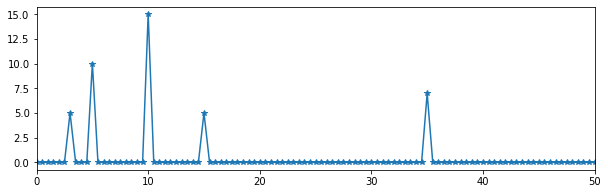

In [16]:
plt.figure(figsize=(10,3))
plt.plot(frequencies, np.abs(fourierCoefsF[:len(frequencies)]) * 2, '*-')
plt.xlim((0,50))
plt.show()

## VIDEO: Spectral analysis of resting-state EEG

In [17]:
data = loadmat('../EEGrestingState.mat')
eegdata = np.squeeze(data['eegdata'])
srate = data['srate'][0][0]
srate

1024

In [18]:
# % create a time vector that starts from 0
npnts = len(eegdata)
time = np.linspace(0,npnts/srate,npnts)

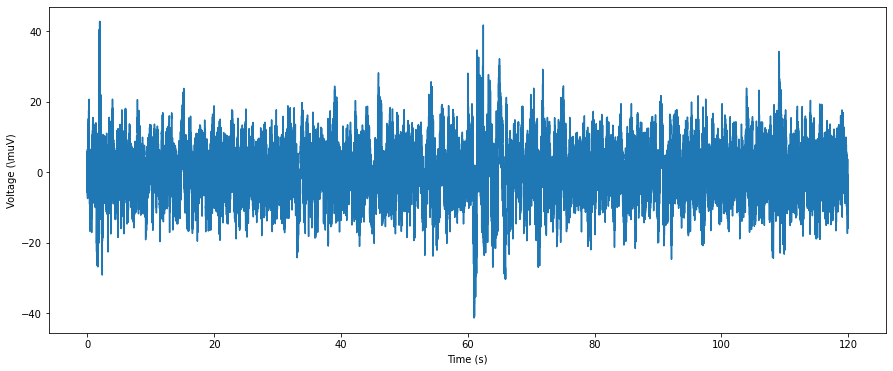

In [19]:
# plot the time-domain signal
plt.figure(figsize=(15,6))
plt.plot(time, eegdata)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (\muV)')
plt.show()

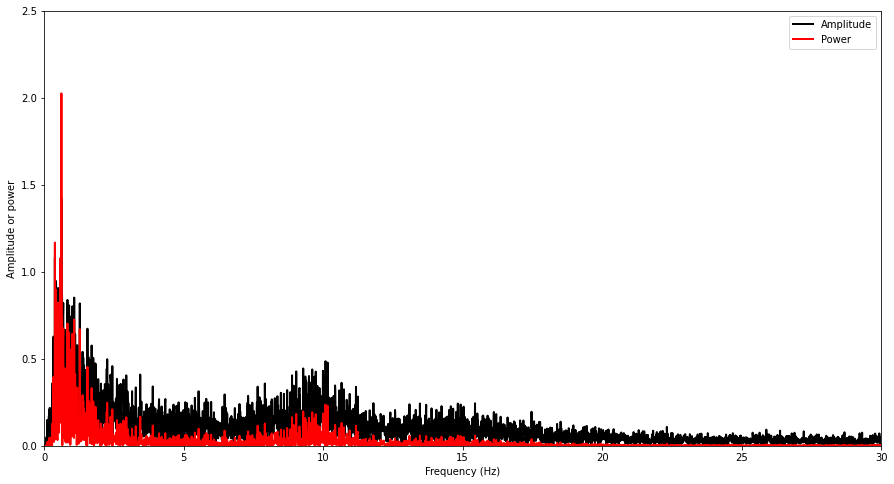

In [20]:
# static spectral analysis
hz = np.linspace(0, srate/2, npnts//2+1)
ampl = 2 * abs(np.fft.fft(eegdata) / npnts)
powr = ampl ** (2)

plt.figure(figsize=(15,8))
plt.plot(hz,ampl[:len(hz)],'k',linewidth=2)
plt.plot(hz,powr[:len(hz)],'r',linewidth=2)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude or power')
plt.legend({'Amplitude','Power'})

# % optional zooming in
plt.xlim([0, 30])
plt.ylim([0,2.5])
plt.show()

# %%% QUESTION: What are the three most prominent features of the EEG spectrum?
# % 
# %%% QUESTION: What do you notice about the difference between the amplitude
# %             and power spectra?
# % 
# %%% QUESTION: Can you see the ~10 Hz oscillation in the raw time series data?
# % 

## %  VIDEO: Quantify alpha power over the scalp

In [21]:
# % These data comprise 63 "epochs" of resting-state data. Each epoch is a
# %   2-second interval cut from ~2 minutes of resting-state.
# % The goal is to compute the power spectrum of each 2-second epoch
# %   separately, then average together.
# %   Then, extract the average power from 8-12 Hz (the "alpha band") and
# %   make a topographical map of the distribution of this power.

In [22]:
data = loadmat('../restingstate64chans.mat')
eegdata = data['EEG']['data'][0][0]
srate = data['EEG']['srate'].item()[0][0]
ntrials = srate * 2
srate

1024

In [23]:
srate.flatten()

array([1024], dtype=uint16)

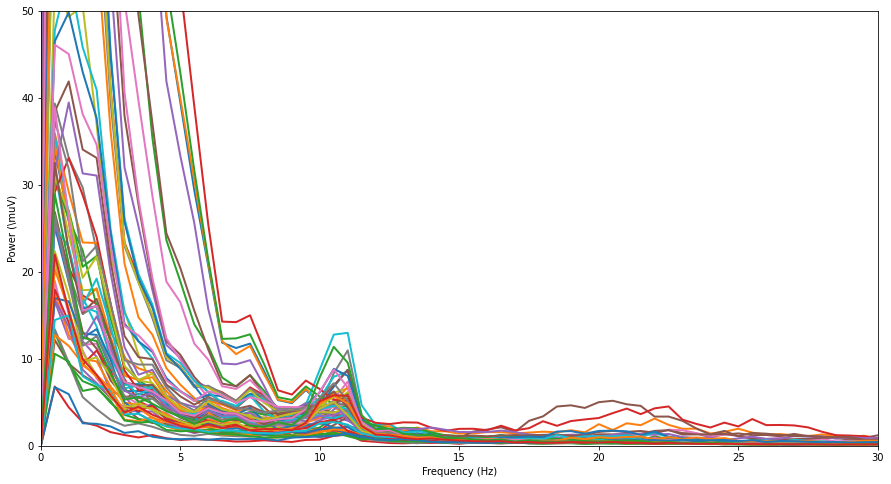

In [24]:
hz = np.linspace(0, srate/2, ntrials//2+1)
chanpowr = (2 * abs(np.fft.fft(eegdata, axis=1) / ntrials)) ** 2
# then average over trials
chanpowr = np.mean(chanpowr, axis=2)

# % do some plotting
# % plot power spectrum of all channels
plt.figure(figsize=(15,8))
plt.plot(hz,chanpowr[:,:len(hz)].T,linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (\muV)')
plt.xlim([0,30])
plt.ylim([0,50])
plt.show()

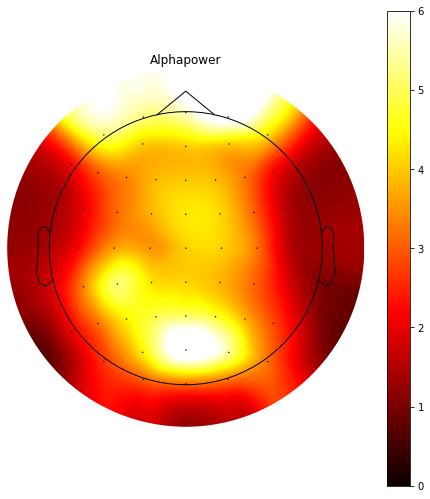

In [25]:
# %% now to extract alpha power

def freq_to_id(freq):
    return np.argmin(np.abs(hz - freq))

# % boundaries in hz
alphabounds = [8,12]

# % convert to indices
freqidx = [freq_to_id(alphabounds[0]), freq_to_id(alphabounds[1])]

# % extract average power
alphapower = np.mean(chanpowr[:, freqidx[0]:freqidx[1]], axis=1)
alphapower.shape

topoPlotIndie(data['EEG'], alphapower, 'Alphapower', (0,6), 'hot', 0)

##  VIDEO: Reconstruct a signal via inverse Fourier transform

In [26]:
# %% create the signal

# % define a sampling rate and time vector
srate = 1000
time = np.arange(-1, 1, 1/srate)

# % frequencies
frex = [ 3, 10, 5, 15, 35 ]

In [29]:
signal = np.zeros(len(time))
for i in range(len(frex)):
    signal += signal + i * np.sin(2*np.pi*time*frex[i])

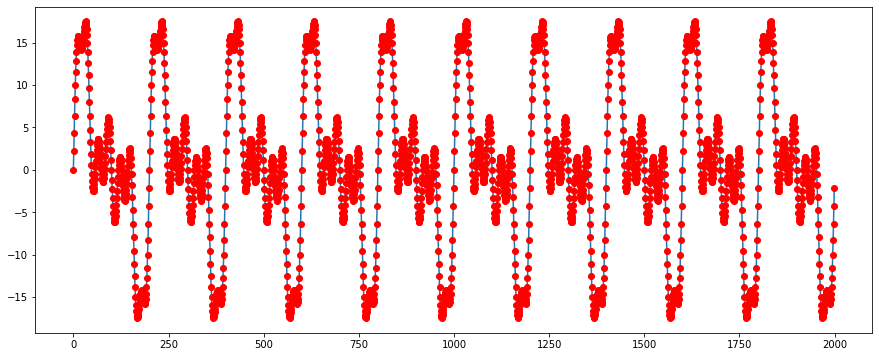

In [61]:
# %% on to the ift!

# %%% Here you will invert the Fourier transform,
# %   by starting from Fourier coefficients and getting back into the time domain.

N = len(signal)
fourierTime = np.arange(N) / N
reconSignal = np.zeros(N)
fourierCoefs = fft(signal) / N

for fi in range(N):
#     % create coefficient-modulated sine wave for this frequency
#     % Note: this is a complex sine wave without the minus sine in the exponential.
    fourierSine = np.exp(1j * 2 * np.pi * fi * fourierTime)

#     % continue building up signal...
    reconSignal = reconSignal + fourierSine * fourierCoefs[fi]
        
plt.figure(figsize=(15,6))
plt.plot(reconSignal.real, '.-')
plt.plot(signal, 'ro')
plt.show()